In [1]:
import pandas as pd
# !pip install plotly_express
import plotly_express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot


In [2]:
#set notebook mode
init_notebook_mode(connected=True)

In [4]:
#read data using panda frame
import os
print(os.getcwd())
#df = pd.read_csv("TP-Regression/possum.csv")
df = pd.read_csv("./Position_Salaries.csv")
# df = df.drop('case', axis=1)
df.head()

/home/yasser/code/TP02


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# count the number of valid features
df.count()

Position    10
Level       10
Salary      10
dtype: int64

In [6]:
# show some information about the data frame
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
# extract information about the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [8]:
# extract the number of sample points
n_rows = df.shape[0]

In [9]:
# extract some X data to predict ouput
# chest and belly also works out
X=df['Level'].to_numpy().reshape(n_rows)
#extract some Y data
y=df['Salary'].to_numpy().reshape(n_rows)

In [10]:
# ensure that he dimensions are OK
X.shape, y.shape

((10,), (10,))

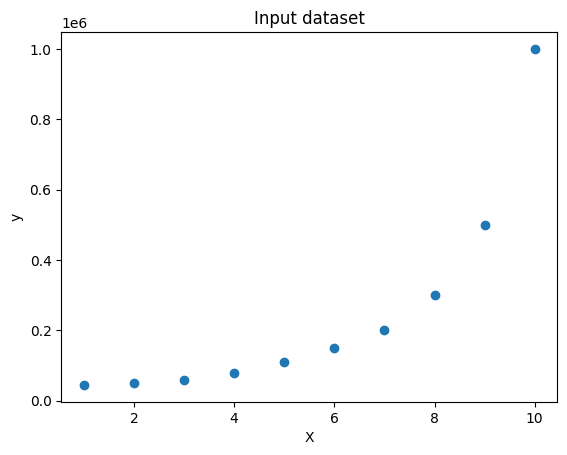

In [11]:
# plot the input data
plt.scatter(X,y)
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

# First regression method using least square
$Ax \approx y$


In [12]:
#A = np.vstack([X[:,0], np.ones(n_rows)]).T
A=np.c_[X,np.ones(len(X))]
print("shape of A:",A.shape)

shape of A: (10, 2)


In [13]:
print(A[0:5,:])

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]


In [14]:
### YOUR CODE HERE, compute the solution using the pseudo inverse of A
# Manually compute the pseudoinverse of A

# Compute A^T * A
A_T = A.T                                # Transpose of A
A_T_A = A_T @ A                          # A^T * A

# Add regularization term alpha * I


# Compute the inverse of (A^T * A + alpha * I)
A_T_A_inv = np.linalg.inv(A_T_A) # Inverse

# Compute A^T * y
A_T_y = A_T @ y

# Compute the solution X
alfa = A_T_A_inv @ A_T_y

print(alfa)

[  80878.78787879 -195333.33333333]


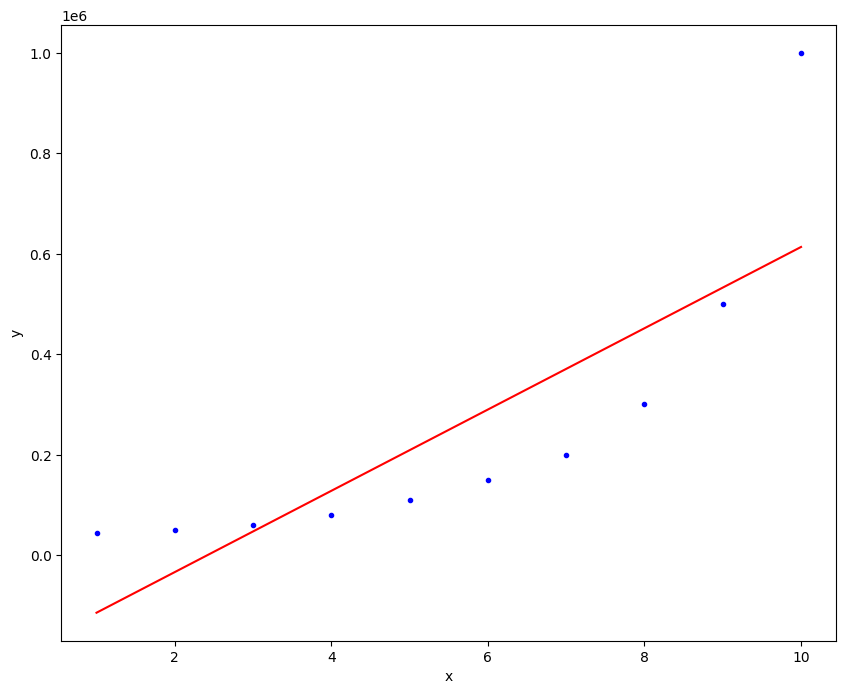

In [15]:
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, alfa[0]*z + alfa[1], 'r')
y_pred=A@alfa
#plt.plot(X, y_pred, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
# another possibility is the use of the pseudo inverse of numpy
# search numpy documentation of pseudo inverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[  80878.78787879 -195333.33333333]


In [17]:
# last possibility with scipy optimize function
from scipy import optimize
def func(x, a, b):
    y = a*x + b
    return y
alpha = optimize.curve_fit(func, xdata = X, ydata = y)[0]
print(alpha)

[  80878.7886826  -195333.33910808]


In [18]:
def cost(A,theta,y):
    return np.sqrt(np.mean(np.matmul(A,theta) - y)**2)

In [19]:
#Compute residuals
print("X shape",X.shape)
print("A shape",A.shape)
print("alpha shape",alpha.shape)
print("y shape",y.shape)
res = np.dot(A,alpha) - y
res = A @ alpha - y
print("res shape ",res.shape)
print("Residuals: ",np.linalg.norm(res))
print("Residuals explicit: ",sum((res)**2)/n_rows)
print("Cost",cost(A,alpha,y))

X shape (10,)
A shape (10, 2)
alpha shape (2,)
y shape (10,)
res shape  (10,)
Residuals:  516680.547223125
Residuals explicit:  26695878787.87879
Cost 0.0013537563732825219


Residuals:  3780080.3163052634


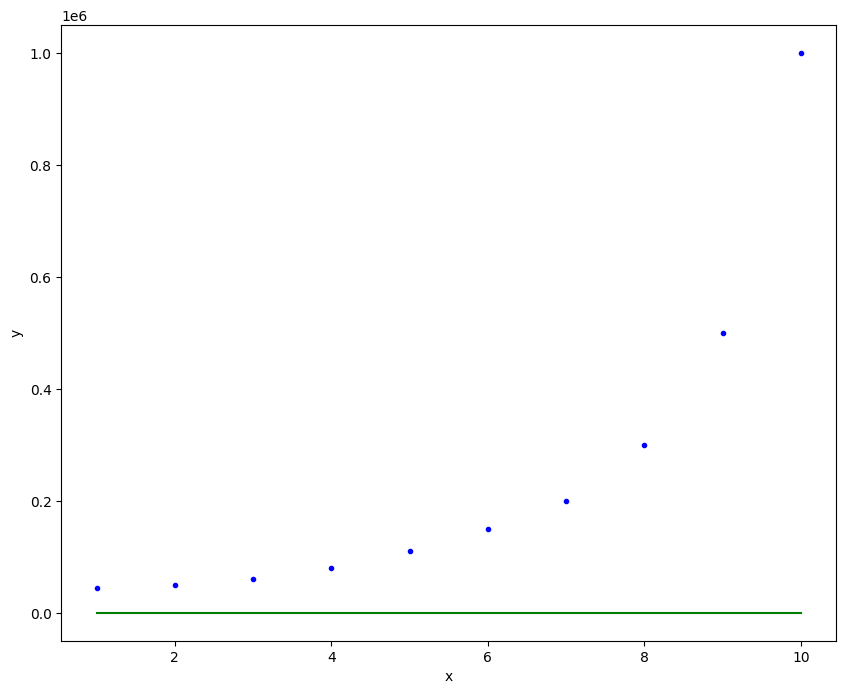

In [20]:
# dummy test with another beta
beta=np.array([[0.9],[40]])
res2 = A @ beta - y
print("Residuals: ",np.linalg.norm(res2))
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, beta[0]*z + beta[1], 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Add ridge regularization


In [21]:
lam=1
# add ridge regularization

### YOUR CODE HERE, compute the solution using the pseudo inverse of A
# Manually compute the pseudoinverse of A

# Compute A^T * A
A_T = A.T                                # Transpose of A
A_T_A = A_T @ A                          # A^T * A

# Add regularization term alpha * I
n = A_T_A.shape[0]                       # Size of the square matrix A^T * A
I = np.eye(n)                            # Identity matrix
lamda = 0.1
A_T_A_reg = A_T_A + lamda * I            # A^T * A + alpha * I

# Compute the inverse of (A^T * A + alpha * I)
A_T_A_reg_inv = np.linalg.inv(A_T_A_reg) # Inverse

# Compute A^T * y
A_T_y = A_T @ y

# Compute the solution X
alpha_ridge = A_T_A_reg_inv @ A_T_y

print(alpha_ridge)
res_ridge =A @ alpha_ridge - y
print("Residuals with ridge: ",np.linalg.norm(res_ridge))

[  79541.59003366 -186117.56949023]
Residuals with ridge:  516856.794208816


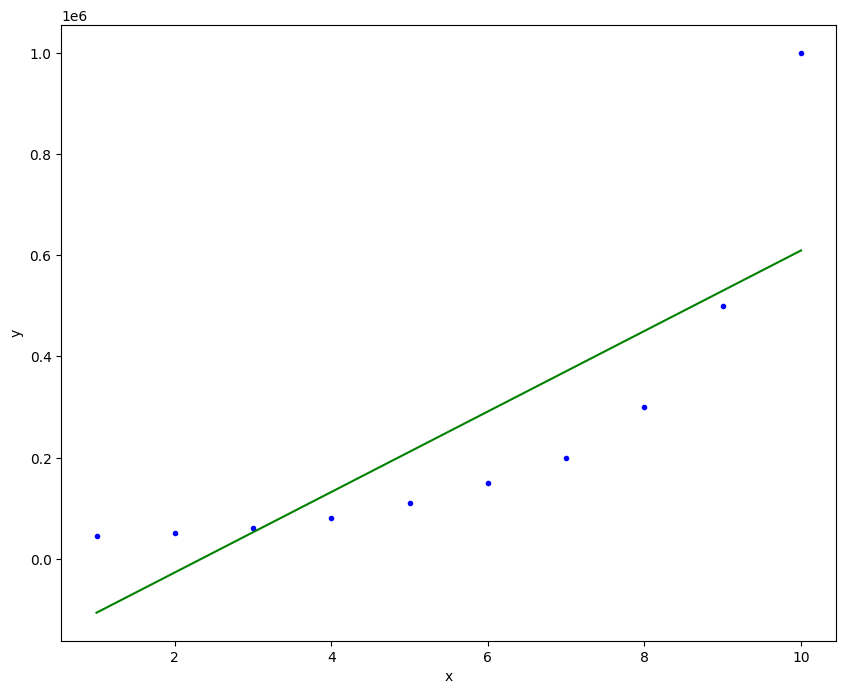

In [22]:
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, alpha_ridge[0]*z + alpha_ridge[1], 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Non-linear regression

In [23]:
# check non linear relationships
df.count()

Position    10
Level       10
Salary      10
dtype: int64

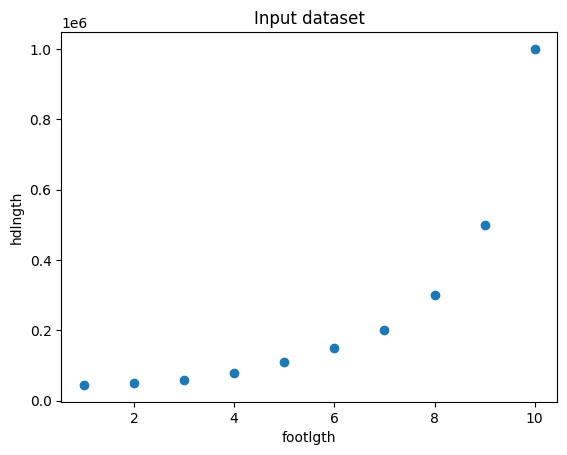

In [26]:
# plot the input data
plt.scatter(X,y)
plt.xlabel(x_label); plt.ylabel(y_label);
plt.title('Input dataset');

In [27]:
# put the data in matrix form
A2=np.c_[X**2,X,np.ones(len(X))]
print("shape of A2:",A2.shape)

shape of A2: (10, 3)


In [28]:
# Use of the pseudo inverse of numpy to get regression coefficients
pinv2 = np.linalg.pinv(A2)
alpha2 = pinv2.dot(y)
print(alpha2)

[  19431.81818182 -132871.21212121  232166.66666667]


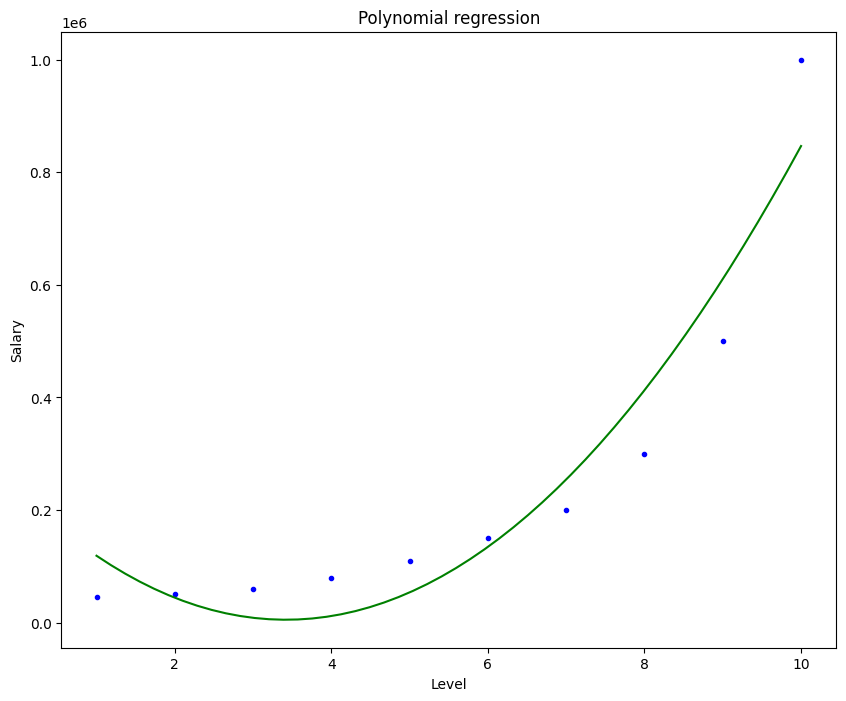

In [30]:
# plot the result
# plot the result
plt.figure(figsize = (10,8))
plt.plot(X, y, 'b.')
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, alpha2[0]*z*z + alpha2[1]*z+alpha2[2], 'g')
plt.xlabel("Level"); plt.ylabel("Salary");
plt.title('Polynomial regression');
plt.show()

## Additional work:

Load in memory the position salary dataset (https://www.kaggle.com/datasets/shimayaghoubian/position-salaries), since the csv file is provided. Inspect the data and try various polynomial regression of salary versus level
